In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/kaggle/input/amazon-books-reviews/books_data.csv
/kaggle/input/amazon-books-reviews/Books_rating.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
book_data = pd.read_csv('/kaggle/input/amazon-books-reviews/books_data.csv')

book_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


> **EDA**

In [8]:
book_data.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [9]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [10]:
book_data = book_data.drop(['image','previewLink','publisher','publishedDate','infoLink','ratingsCount'],axis = 1)
book_data.head()

,Title,description,authors,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN


In [11]:
book_data.rename(columns={'Title': 'title'}, inplace=True)
book_data.head()

,title,description,authors,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN


In [21]:
book_data = book_data.drop_duplicates()

In [22]:
book_data['description'] = book_data['description'].fillna('unknown')
book_data['authors'] = book_data['authors'].fillna('unknown')


In [23]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Define a function to extract and match categories
def match_category(description, current_categories):
    doc = nlp(description)
    categories = []
    for ent in doc.ents:
        if ent.text in current_categories:
            categories.append(ent.text)
    return ', '.join(categories) if categories else 'unknown'

# Get unique current categories from the dataset
unique_categories = set(book_data['categories'].dropna().unique())

# Apply the function to fill missing categories
book_data['categories'] = book_data.apply(
    lambda row: match_category(row['description'], unique_categories) if pd.isna(row['categories']) else row['categories'],
    axis=1
)


In [24]:
bookCategories = book_data['categories'].value_counts()
print(bookCategories)

categories
unknown                                   41199
['Fiction']                               23419
['Religion']                               9459
['History']                                9330
['Juvenile Fiction']                       6643
                                          ...  
['Authors, Japanese']                         1
['Birth certificates']                        1
['Restaurant management']                     1
['Oxford (England)']                          1
['Flame in the wind (Motion picture)']        1
Name: count, Length: 10884, dtype: int64


In [25]:
unique_categories

{"['National teacher examinations']",
 "['Jury']",
 "['Creationism']",
 "['Architecture']",
 "['Giles County (Va.)']",
 "['Lay ministry']",
 "['Readers for new literates']",
 "['Classified catalogs (Dewey decimal)']",
 "['Fruit wines']",
 "['Wolves']",
 "['Living trusts']",
 "['Histoire - History - Portugal']",
 "['Kenya']",
 "['Geotextiles']",
 "['Cynobacterin']",
 "['Bartholomew (Fictitious character : Miller)']",
 "['Hadith']",
 "['Embedded computer systems']",
 "['Christian education of children']",
 "['Day care centers']",
 "['Dental hygiene']",
 "['Mental health services']",
 "['BIBLES']",
 "['Reducing exercises']",
 "['Kings and rulers']",
 "['Humanistic psychotherapy.']",
 "['America']",
 "['Foard County (Tex.)']",
 "['Critical thinking']",
 "['Calendar, Jewish']",
 "['Psychologists']",
 "['Pel, Chief Inspector (Fictitious character)']",
 "['Animals in art']",
 "['Duelling']",
 "['Burrowing animals']",
 "['Book of the dead']",
 "['Amish']",
 "['Lung Diseases']",
 "['Buttons']",

In [26]:
# Calculate the count of each category
category_counts = book_data['categories'].value_counts()

# Filter the DataFrame to keep only rows where the count of the category is 100 or more
book_data = book_data[book_data['categories'].isin(category_counts[category_counts >= 100].index)]

book_data.head()

,title,description,authors,categories
0,Its Only Art If Its Well Hung!,unknown,['Julie Strain'],['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",unknown,['Edward Long'],unknown


In [27]:
book_data.shape

(178467, 4)

<ipython-input-29-df8c5209c6de>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(book_data['categories'], bins=30, kde=True, palette="dark")  # Adding a bright color palette
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


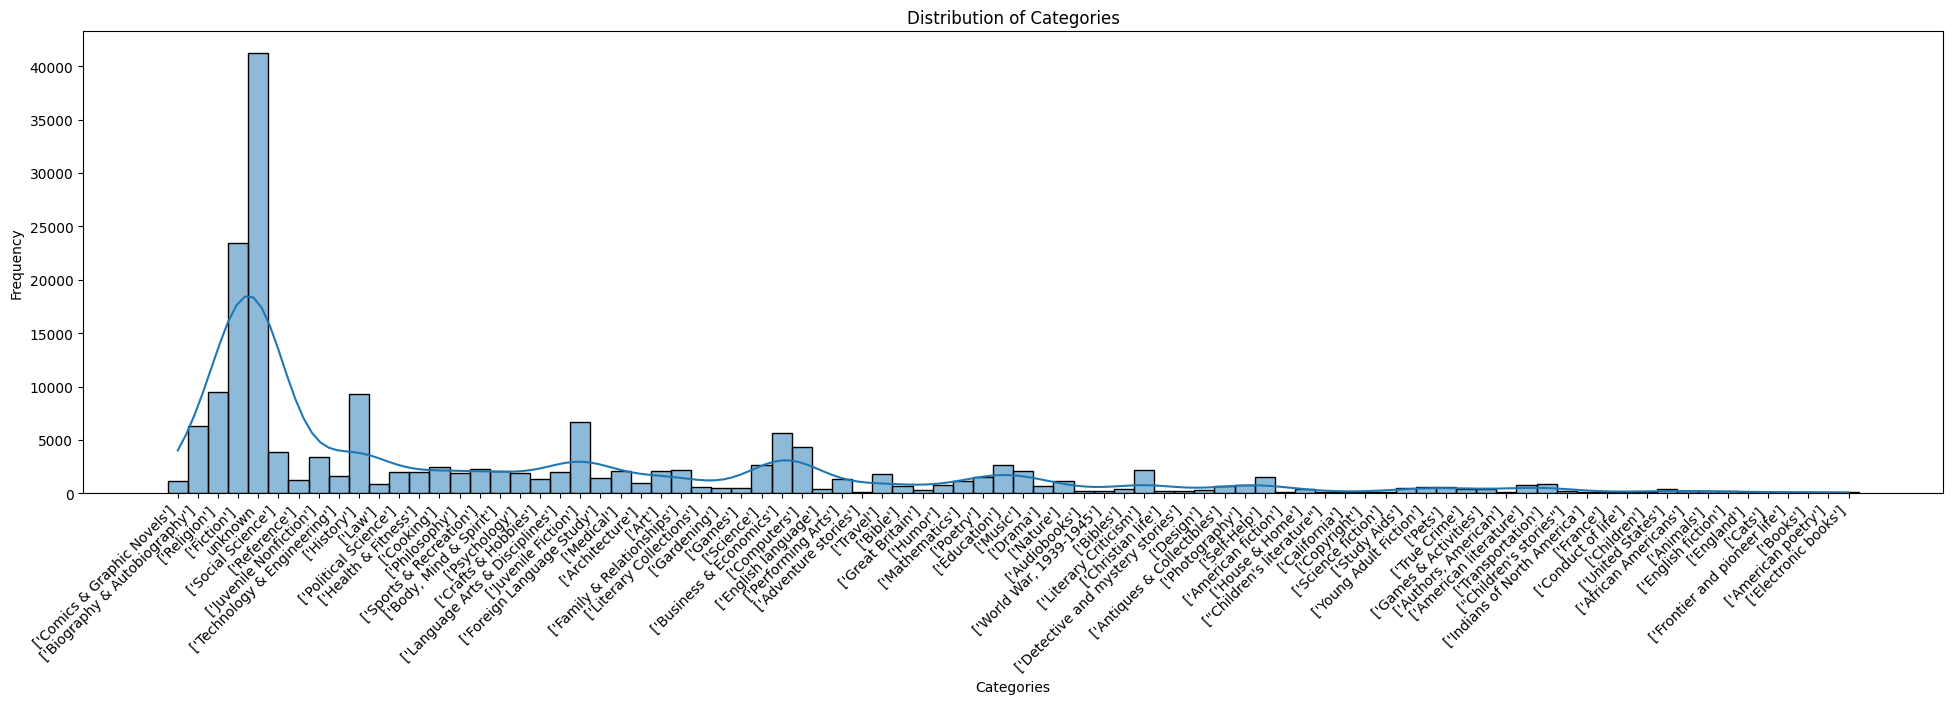

In [29]:

# Plotting the distribution of categories
plt.figure(figsize=(24, 6))
sns.histplot(book_data['categories'], bins=30, kde=True, palette="dark")  # Adding a bright color palette
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')


plt.xticks(rotation=45, ha='right')  


plt.show()
w

We rather keep the distribution as it is for the real world estimation.

In [30]:
unique_categories_cleaned = set(book_data['categories'].dropna().unique())
category_counts = book_data['categories'].value_counts()

In [31]:
# Function to clean the category column
def clean_column(column):
    # Remove [' at the beginning and '] at the end
    if pd.notna(column):
        column = column.strip("['']").lower()
        # Remove any . at the end of the words
        column = ' '.join([word.rstrip('.') for word in column.split()])
    return column

# Apply the function to the category column
book_data['categories'] = book_data['categories'].apply(clean_column)
book_data['title'] = book_data['title'].apply(clean_column)
book_data['authors'] = book_data['authors'].apply(clean_column)

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply cleaning function to 'category' and 'description'
book_data['categoriesCleaned'] = book_data['categories'].apply(clean_text)
book_data['descriptionCleaned'] = book_data['description'].apply(clean_text)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [33]:
book_data.head(30)

,title,description,authors,categories,categoriesCleaned,descriptionCleaned
0,its only art if its well hung!,unknown,julie strain,comics & graphic novels,comics graphic novels,unknown
1,dr seuss: american icon,Philip Nel takes a fascinating look into the k...,philip nel,biography & autobiography,biography autobiography,philip nel takes fascinating look key aspects ...
2,wonderful worship in smaller churches,This resource includes twelve principles in un...,david r ray,religion,religion,resource includes twelve principles understand...
3,whispers of the wicked saints,Julia Thomas finds her life spinning out of co...,veronica haddon,fiction,fiction,julia thomas finds life spinning control death...
4,"nation dance: religion, identity and cultural ...",unknown,edward long,unknown,unknown,unknown
5,the church of christ: a biblical ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,everett ferguson,religion,religion,church christ biblical ecclesiology today resp...
6,the overbury affair (avon),unknown,miriam allen de ford,unknown,unknown,unknown
7,a walk in the woods: a play in two acts,unknown,lee blessing,unknown,unknown,unknown
8,saint hyacinth of poland,The story for children 10 and up of St. Hyacin...,mary fabyan windeatt,biography & autobiography,biography autobiography,story children 10 st hyacinth dominican plante...
9,rising sons and daughters: life among japan's ...,Wardell recalls his experience as a foreign st...,steven wardell,social science,social science,wardell recalls experience foreign student jap...


> **Feature Extraction usind TF-IDF**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the 'descriptionCleaned' column
tfidf_description = tfidf.fit_transform(book_data['descriptionCleaned'])

tfidf_categories = tfidf.fit_transform(book_data['categoriesCleaned'])


In [35]:
from scipy.sparse import hstack

# Combine the two TF-IDF matrices
tfidf_combined = hstack([tfidf_description, tfidf_categories])
tfidf_combined

<178467x1110 sparse matrix of type '<class 'numpy.float64'>'
	with 3048527 stored elements in Compressed Sparse Row format>

In [36]:
# Dimension reduction
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
reduced_tfidf = svd.fit_transform(tfidf_combined)
reduced_tfidf

array([[ 0.73634134,  0.0135303 ,  0.20172527, ...,  0.02027428,
        -0.00152934, -0.02198843],
       [ 0.00473421,  0.03498983,  0.12147292, ..., -0.01422229,
        -0.01731778,  0.08046704],
       [ 0.00865089,  0.02287414,  0.75539476, ...,  0.00208881,
         0.09159563,  0.03518466],
       ...,
       [ 0.67811762, -0.02315605, -0.21157879, ...,  0.04848229,
        -0.05876101,  0.04617004],
       [ 0.01982942,  1.00708488, -0.02246905, ...,  0.03417595,
         0.07640938,  0.02529002],
       [ 0.67846235, -0.02075023, -0.19059647, ..., -0.03721113,
         0.03750794, -0.01401955]])

> **Training the Model**

In [38]:
from annoy import AnnoyIndex

num_dimensions = reduced_tfidf.shape[1]  # Set number of SVD components
annoy_index = AnnoyIndex(num_dimensions, 'angular')

for i in range(reduced_tfidf.shape[0]):
    annoy_index.add_item(i, reduced_tfidf[i])

annoy_index.build(100)  # Number of trees; can be adjusted for balance between speed and accuracy

True

In [39]:
book_index = 12  # Index of the book for which you want to find similar books
# Retrieve the top 5 similar books for a given book
similar_books = annoy_index.get_nns_by_item(book_index, 5)

In [40]:
similar_books

[12, 116684, 44566, 29511, 126181]

In [41]:
print(f"Top 5 similar books to '{book_data.iloc[book_index]['title']} with categories of {book_data.iloc[book_index]['categories']}':")

Top 5 similar books to 'mensa number puzzles (mensa word games for kids) with categories of juvenile nonfiction':


In [42]:
for book_id in similar_books:
    # Get the book data for the given book_id
    book_info = book_data.iloc[book_id]

    print(f"Title: {book_info['title']}")
    print(f"Categories: {book_info['categories']}")
    print(f"Authors: {book_info['authors']}")
    print(f"Description: {book_info['description']}")
    print("\n" + "-"*50 + "\n")  


Title: mensa number puzzles (mensa word games for kids)
Categories: juvenile nonfiction
Authors: evelyn b christensen
Description: Acclaimed teacher and puzzler Evelyn B. Christensen has created one hundred brand-new perplexing and adorably illustrated games for young puzzlers. There is something for every type of learner here, including number puzzles, word puzzles, logic puzzles, and visual puzzles. She has also included secret clues the solver can consult if they need a hint, making the puzzles even more flexible for a wide skill range of puzzle-solvers. Arranged from easy to difficult, this is a great book for any beginning puzzler. With the game types intermixed throughout, it’s easy for a child who thinks they like only math or only word puzzles to stumble across a different kind of puzzle, get hooked, and discover—oh, they like that kind, too! Regularly practicing a variety of brain games can help improve and develop memory, concentration, creativity, reasoning, and problem-solv